In [ ]:
import torch
# from multiprocessing import Process, Pool
from packages.rl.exp.exp_toolbox import generate_tasks, train, predict, save, reproduce, transfer_prediction_no_training, transfer_prediction_with_training

In [ ]:
max_steps = int(1e5)
start_steps = int(2048)

# extra_steps = [(max_steps, start_steps)] 
# extra_steps = [(int(1e5), int(1e4))]

class TheoryData:
    def __init__(self):
        self.theories=[
            # {
            #     "theory": "Yang-Lee",
            #     "scope": f"Local_{max_steps}_{start_steps}_7_states_8_envs_8_ups",
            #     "spins": [0.0, 2.0, 4.0, 0.0, 6.0, 6.0, 0.0],
            #     "dSigma": -0.4,
            #     "d_max": 8.0,
            #     "init_state": [-0.4, 2.0, 3.6, 4, 5.6, 6, 7.6],
            #     "bound": [
            #         [-1.0, 0.0], 
            #         [1.5, 2.5], 
            #         [3.0, 4.0], 
            #         [3.5, 4.5], 
            #         [5.0, 6.0], 
            #         [5.5, 6.5], 
            #         [7.0, 8.0],
            #     ],
            #     "lambda_0": 0.42,
            #     "max_steps": max_steps,
            #     "start_steps": start_steps,
            #     "num_envs": 4,
            #     "updates_per_step": 2,
            #     "agent_type": "CSAC+DSAC",
            # },
            {
                "theory": "Ising",
                "scope": f"Local_{max_steps}_{start_steps}_7_states_IDSAC",
                "spins": [0.0, 2.0, 4.0, 0.0, 4.0, 2.0, 6.0],
                "dSigma": 0.125,
                "d_max": 7.0,
                "init_state": [1.0, 2.0, 4.0, 4.0, 5.0, 6.0, 6.0],
                "bound": [
                    [0.5, 1.5], 
                    [1.5, 2.5], 
                    [3.5, 4.5], 
                    [3.5, 4.5],
                    [4.5, 5.5],
                    [5.5, 6.5],
                    [5.5, 6.5],
                ],
                "lambda_0": 0.42,
                "max_steps": max_steps,
                "start_steps": start_steps,
                "num_envs": 1,
                "updates_per_step": 2,
                "agent_type": var,
                "gamma": 0.9,
                "max_episode_len": 30,
            }
            for var in ["ISAC+DSAC"]
            # for var in ["SAC", "CSAC", "DSAC", "CSAC+DSAC", "ISAC+DSAC", "CSAC+ISAC+DSAC"]
        ]
        
        self.model_names = [
            theory["theory"]+"_"+theory["scope"]
            for theory in self.theories
        ]

In [ ]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu"), 
data=TheoryData()

Training (ISAC_DSACAgent): 100%|██████████| 100000/100000 [37:43<00:00, 44.18iter/s]


Finished training in 2263.72 sec (~ 37.0 min).
----------------------------------------------


[<Figure size 1000x800 with 2 Axes>]

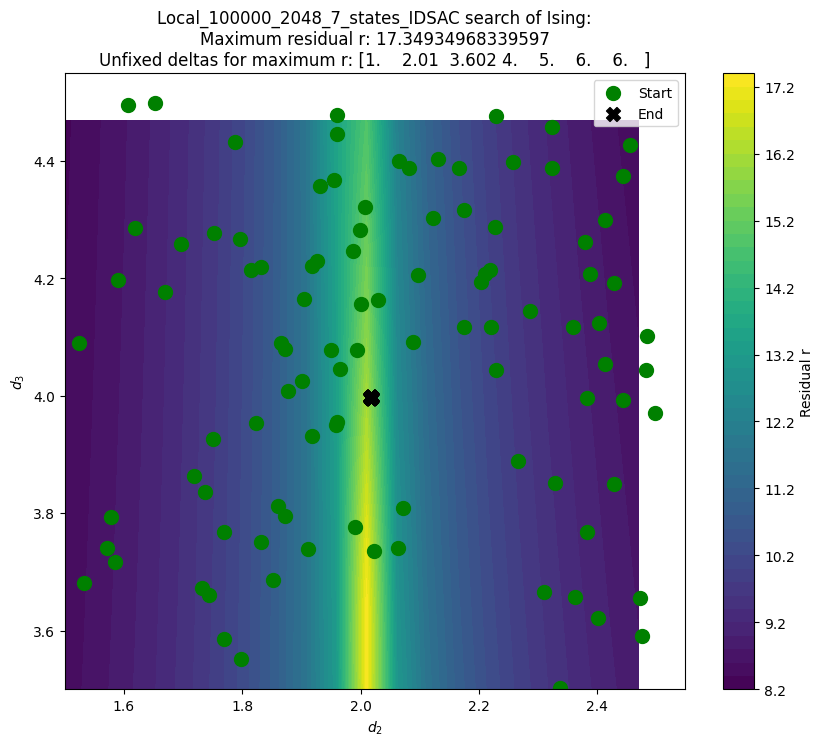

In [4]:
# generate new tasks for training
tasks = generate_tasks(data, *device)

# train new tasks
trained_tasks = train(tasks)

# use trained_tasks for prediction
predict(trained_tasks)

# save trained model
save(trained_tasks, data, subscript="saved_base_model")

In [5]:
max_steps = int(1e5)
start_steps = int(2048)

extra_steps = [(max_steps, start_steps)] 
extra_steps = [(int(1e4), int(2048))]

class TheoryDataForFurtherTraining:
    def __init__(self):
        self.theories=[
            {
                "theory": "Yang-Lee",
                "scope": f"Local_{max_steps}_{start_steps}_7_states_IDSAC",
                "spins": [0.0, 2.0, 4.0, 0.0, 6.0, 6.0, 0.0],
                "dSigma": -0.4,
                "d_max": 8.0,
                "init_state": [-0.4, 2.0, 3.6, 4, 5.6, 6, 7.6],
                "bound": [
                    [-1.0, 0.0], 
                    [1.5, 2.5], 
                    [3.0, 4.0], 
                    [3.5, 4.5], 
                    [5.0, 6.0], 
                    [5.5, 6.5], 
                    [7.0, 8.0],
                ],
                "lambda_0": 0.42,
                "max_steps": max_steps,
                "start_steps": start_steps,
                "num_envs": 1,
                "updates_per_step": 2,
                "agent_type": "ISAC+DSAC",
                "gamma": 0.9,
                "max_episode_len": 30,
            },
            {
                "theory": "Ising",
                "scope": f"Local_{max_steps}_{start_steps}_7_states_IDSAC",
                "spins": [0.0, 2.0, 4.0, 0.0, 4.0, 2.0, 6.0],
                "dSigma": 0.125,
                "d_max": 7.0,
                "init_state": [1.0, 2.0, 4.0, 4.0, 5.0, 6.0, 6.0],
                "bound": [
                    [0.5, 1.5], 
                    [1.5, 2.5], 
                    [3.5, 4.5], 
                    [3.5, 4.5],
                    [4.5, 5.5],
                    [5.5, 6.5],
                    [5.5, 6.5],
                ],
                "lambda_0": 0.42,
                "max_steps": max_steps,
                "start_steps": start_steps,
                "num_envs": 1,
                "updates_per_step": 2,
                "agent_type": "ISAC+DSAC",
                "gamma": 0.9,
                "max_episode_len": 30,
            }
        ]
        
        self.model_names = [
            theory["theory"]+"_"+theory["scope"]+"_saved_base_model"
            for theory in self.theories
        ]

Start training:


Training (ISAC_DSACAgent): 100%|██████████| 10000/10000 [02:53<00:00, 57.71iter/s]


Finished training in 173.28 sec (~ 2.0 min).
----------------------------------------------
Start training:


Training (ISAC_DSACAgent): 100%|██████████| 10000/10000 [08:00<00:00, 20.83iter/s]


Finished training in 480.19 sec (~ 8.0 min).
----------------------------------------------


[<Figure size 1000x800 with 2 Axes>, <Figure size 1000x800 with 2 Axes>]

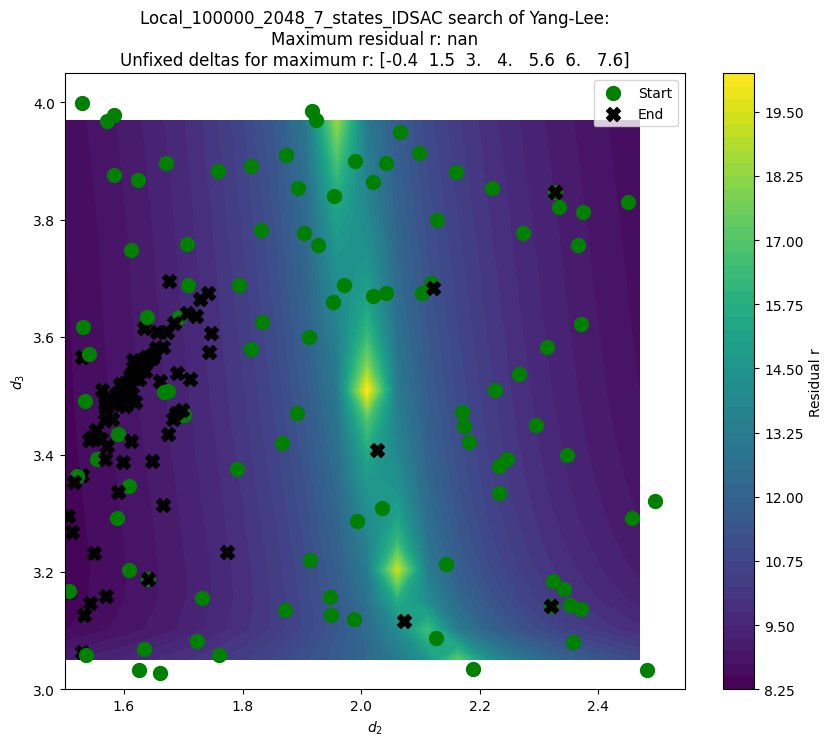

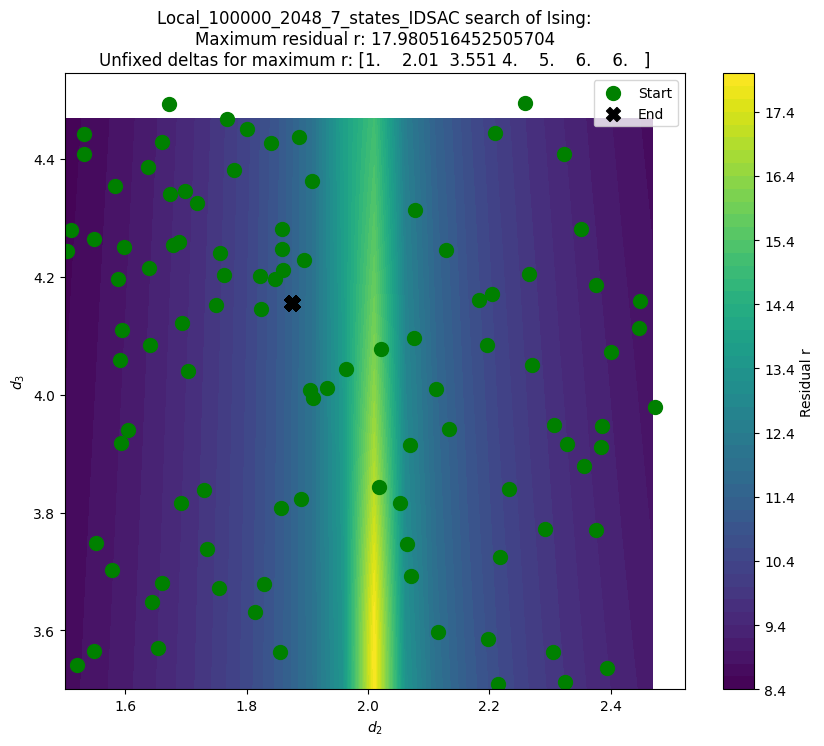

In [6]:
data_further=TheoryDataForFurtherTraining()

# with_training
## generate tasks with fewer max_steps
for max_steps, start_steps in extra_steps:
    tasks = generate_tasks(data_further, *device, max_steps=max_steps, start_steps=start_steps)
    trained_tasks = transfer_prediction_with_training(tasks=tasks, model_name=f'./model/{data.model_names[0]}_saved_base_model')
    # save trained model
    save(trained_tasks, data_further, subscript = f"further_trained_with_base_model")